# Árvore de decisão

### Base de dados: Clima-Nominal

Ilustra o funcionamento do algoritmo de árvore de decisão com dados nominais.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

WEATHER.NOMINAL, Weka

http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html

DESCRIÇÃO DOS ATRIBUTOS:

1. Aparência {Ensolarado, Nublado, Chuvoso}
2. Temperatura {Quente, Moderado, Frio}
3. Umidade {Alta, Normal}
4. Vento {Fraco, Forte}
5. Jogar {Sim, Não}





### Inicialização da plataforma do Colab.

Essa seção instala e carrega os pacotes necessários para a execução do código.

In [1]:
!pip install pydotplus
!pip install dtreeviz

     |████████████████████████████████| 51kB 1.5MB/s 
     |████████████████████████████████| 204.2MB 67kB/s 
     |████████████████████████████████| 204kB 28.0MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.2-cp36-none-any.whl size=52359 sha256=d0fda441570edcbe0920288f548555bf70c260f57d75d3d22c8fc713fe6c1a5b
  Stored in directory: /root/.cache/pip/wheels/6c/42/13/06bfd7ecac5313d2bea233a1e1165fec14a4d3680fa856db57
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=52c89eefdbaef6b290404363336ee76b1e9e827303e24788c213f4ebe82964b1
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree


# WEATHER.NOMINAL, Weka
# http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html
# DESCRIÇÃO DOS ATRIBUTOS:
# Aparência {Ensolarado, Nublado, Chuvoso}
# Temperatura {Quente, Moderado, Frio}
# Umidade {Alta, Normal}
# Vento {Fraco, Forte}
# Jogar {Sim, Não}

from google.colab import files
uploaded = files.upload()




Saving clima.csv to clima.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


In [4]:
# clima_nominal = pd.read_excel("clima.xlsx", sheet_name=0) 
clima_nominal = pd.read_excel('/content/drive/My Drive/PUC/ML/Datasets/clima.xlsx', sheet_name=0)

print("\nDimensões: {0}".format(clima_nominal.shape))
print("\nCampos: {0}".format(clima_nominal.keys()))
print(clima_nominal.describe(), sep='\n')

X_dict = clima_nominal.iloc[:,0:4].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X_train = vect.fit_transform(X_dict)

le = LabelEncoder()
y_train = le.fit_transform(clima_nominal.iloc[:,4])

# Exibe o dado convertido em dicionario.
print("Atributos:", X_dict)

# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento: {0}".format(X_train.shape))

print("Labels:", y_train)




Dimensões: (14, 5)

Campos: Index(['Aparência', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')
         Aparência Temperatura Umidade  Vento Jogar
count           14          14      14     14    14
unique           3           3       2      2     2
top     Ensolarado    Moderado    Alta  Fraco   Sim
freq             5           6       7      8     9
Atributos: dict_values([{'Aparência': 'Ensolarado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Moderado', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 'Frio', 'Umidade': 'Normal', '

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [6]:
treeClima = DecisionTreeClassifier(random_state=0, criterion='entropy')
treeClima = treeClima.fit(X_train, y_train)
print("Acurácia:", treeClima.score(X_train, y_train))

y_pred = treeClima.predict(X_train)
print("Acurácia de previsão:", accuracy_score(y_train, y_pred))
classification_report(y_train, y_pred, target_names=le.classes_)

cnf_matrix = confusion_matrix(y_train, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Jogar=Não", "Jogar=Sim"], columns=["Jogar(prev)=Não", "Jogar(prev)=Sim"])
print(cnf_table)


Acurácia: 1.0
Acurácia de previsão: 1.0
           Jogar(prev)=Não  Jogar(prev)=Sim
Jogar=Não                5                0
Jogar=Sim                0                9


In [8]:
from sklearn.naive_bayes import BernoulliNB
nbClima = BernoulliNB()
nbClima = nbClima.fit(X_train, y_train)
print("Acurácia:", nbClima.score(X_train, y_train))

y_pred = nbClima.predict(X_train)
print("Acurácia de previsão:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred, target_names=le.classes_))

cnf_matrix = confusion_matrix(y_train, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Jogar=Não", "Jogar=Sim"], columns=["Jogar(prev)=Não", "Prev. Jogar(prev)=Sim"])
print(cnf_table)

Acurácia: 0.9285714285714286
Acurácia de previsão: 0.9285714285714286
              precision    recall  f1-score   support

         Não       1.00      0.80      0.89         5
         Sim       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14

           Jogar(prev)=Não  Prev. Jogar(prev)=Sim
Jogar=Não                4                      1
Jogar=Sim                0                      9


In [ ]:
nbClima.feature_log_prob_

array([[-0.84729786, -0.55961579, -1.94591015, -1.25276297, -0.84729786,
        -0.84729786, -0.33647224, -1.25276297, -0.55961579, -0.84729786],
       [-1.01160091, -1.29928298, -0.78845736, -1.01160091, -0.78845736,
        -1.29928298, -1.01160091, -0.45198512, -1.01160091, -0.45198512]])

Exibição da árvore de decisão



In [9]:
from dtreeviz.trees import *

viz = dtreeviz(treeClima,
              X_train,
              y_train,
              target_name='Comprar',
               feature_names=vect.feature_names_,
              class_names=["não", "sim"],
              fancy=True)  

viz.view()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


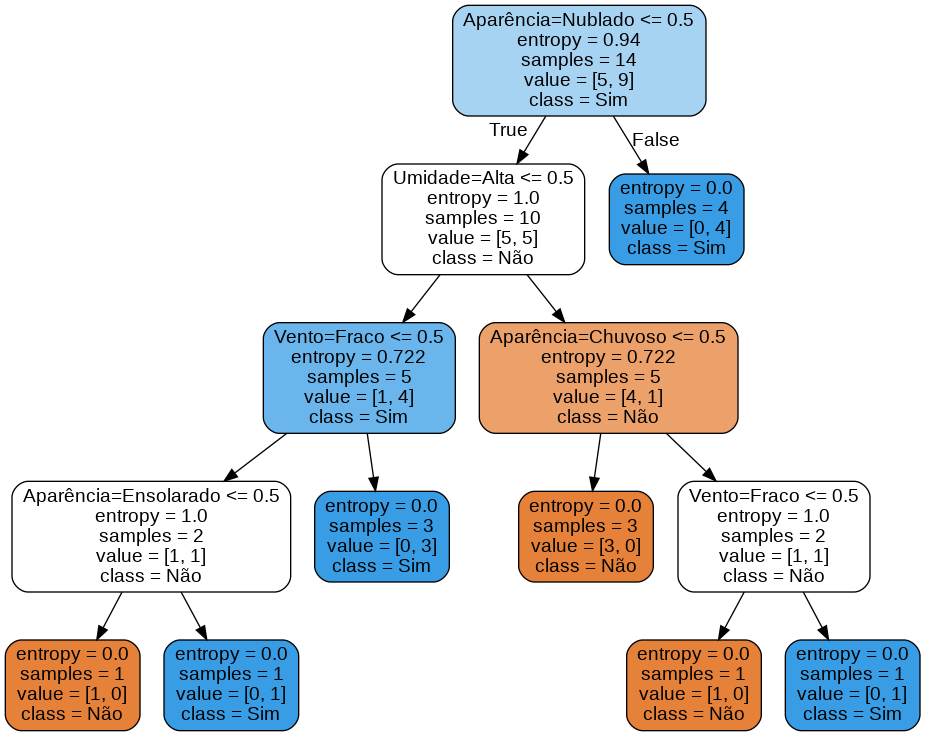

In [10]:
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(treeClima, out_file=None, 
                                feature_names=vect.feature_names_,  
                                rounded =True,
                                filled=True,
                                class_names=le.classes_)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
